# חיזוי סכומי תביעות ביטוחי בריאות

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
src = 'insurance.csv'
data = pd.read_csv(src)

## מידע בסיסי על הנתונים

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## ניתוח נתונים

## התפלגות נתוני סכומי תביעות לפי גיל ומין

Text(0.5, 1.0, 'Distribution of charges by age and sex')

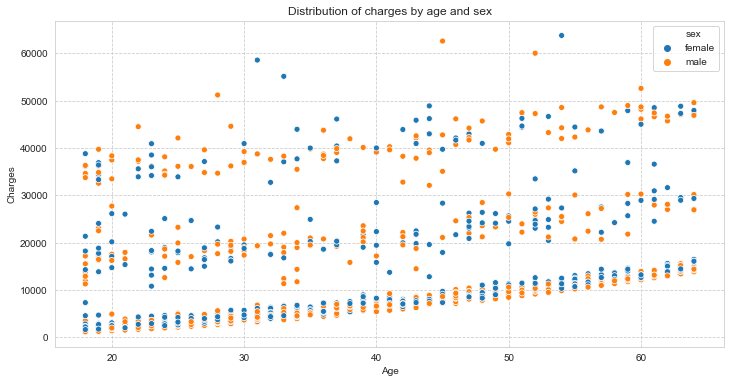

In [9]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12,6))
sns.scatterplot(x = "age", y = "charges", data = data, hue = "sex")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and sex")

#### סכומי תביעות גדל ביחס לגיל
#### אין הבדל ברור בסכומי תביעות עבור גברים לעומת נשים

## התפלגות נתוני סכומי תביעות לפי מדד המעשנים ומדד מסת הגוף 

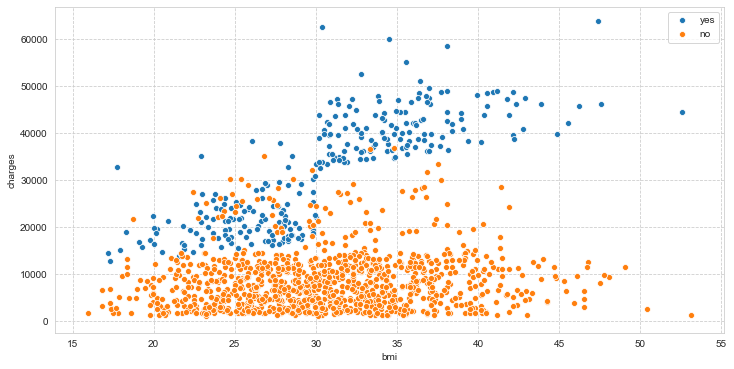

In [8]:
smokers = data["smoker"].unique()
colors = ["Reds", "Greens"]
plt.figure(figsize = (12,6))
for i, smoker in enumerate(smokers):
    temp = data[data["smoker"] == smoker]
    sns.scatterplot(temp["bmi"], temp["charges"], cmap = colors[i])
plt.legend(smokers)

#### ניתן לראות מהגרף שתכונת מסת הגוף אינה חשובה כמו אם אדם מעשן או לא מעשן
#### מעשן נוטה לתבוע סכומי גבוהים בהרבה בהשוואה ללא מעשנים לעומת מדדים שונים של מסת הגוף ששם שינוי בסכומים הוא מזערי

## התפלגות נתוני סכומי תביעות לפי גיל ומדד המעשנים 

Text(0.5, 1.0, 'Distribution of charges by age and sex')

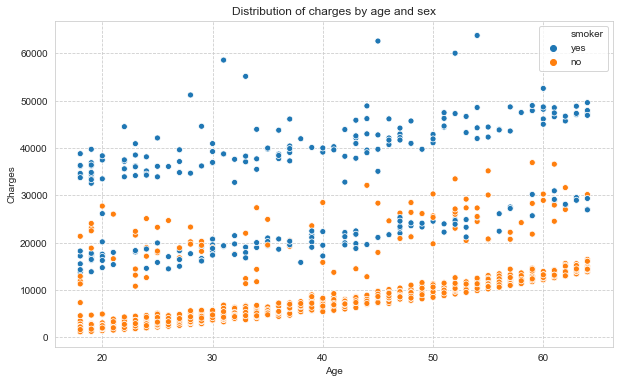

In [11]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "age", y = "charges", data = data, hue = "smoker")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and sex")

## התפלגות נתוני סכומי תביעות לפי מספר הילדים ומדד המעשנים 

Text(0.5, 1.0, 'Distribution of charges by number of children')

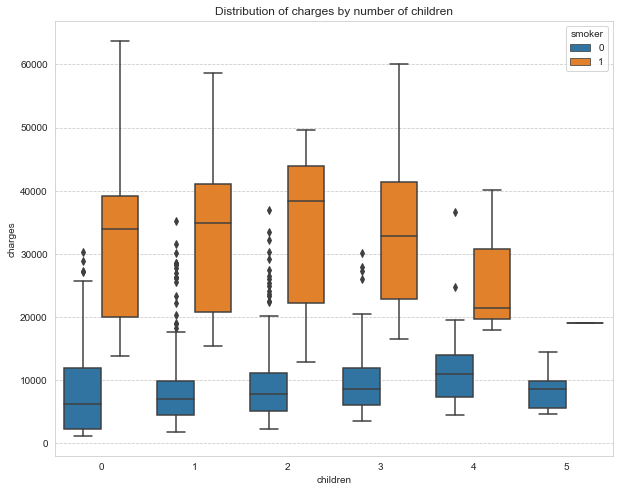

In [26]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "children", y = "charges",hue = "smoker", data = data)
plt.title("Distribution of charges by number of children")

#### נראה שיש סף חיובים. מעשנים בדרך כלל מגישים תביעות בסכום מינימלי של כ- 15000 ללא קשר למספר הילדים ואילו הלא מעשנים נוטים לתביעות מרביות של 20000 (בדרך כלל מתחת ל 15000). עישון הוא בהחלט תכונה חשובה

## מתאם בין התכונות

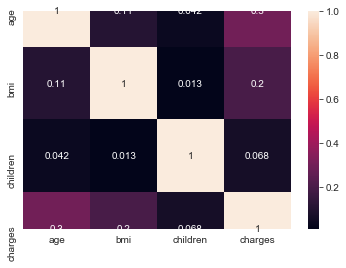

In [18]:
sns.heatmap(data.corr(), annot = True)

#### אין מתאם בין המאפיינים המספריים השונים.

# מודלים

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
# Transforming categorical features to numerical values
data["smoker"] = data["smoker"].replace(["yes","no"], [1,0])
data["sex"] = data["sex"].replace(["male","female"], [1,0])
data["region_southeast"] = data["region"].apply(lambda x: 1 if x == "southeast" else 0)

## Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3630549.354, MSE test data: 19737210.132
R2 train data: 0.971, R2 test data: 0.877


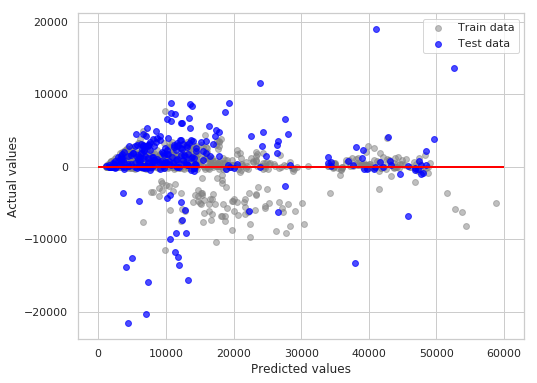

In [22]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218751)
3.age(0.136942)
4.children(0.021042)
5.region(0.015209)
6.sex(0.006377)


<BarContainer object of 6 artists>

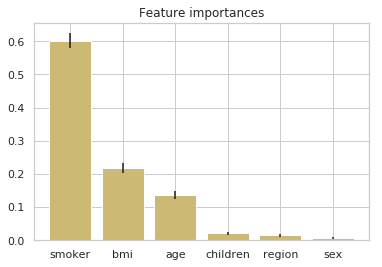

In [23]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

##  Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705252252
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345225


In [25]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776595
Mean Squared Error: 18895160.09878044
Root Mean Squared Error: 4346.856346692451


In [26]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.530000,12101.156323
610,8547.691300,10440.782266
569,45702.022350,48541.022951
1034,12950.071200,14140.067522
198,9644.252500,8636.235727
981,4500.339250,5072.787029
31,2198.189850,3090.494817
1256,11436.738150,13171.361938
1219,7537.163900,9187.612192
1320,5425.023350,7496.320857


In [22]:
# Data are split into training and test data
y_data = data["charges"]
x_data = data.drop(["charges","region"], axis = 1)
x_train, x_test, y_train ,y_test = train_test_split(x_data, y_data, test_size = 0.25)

# Model is trained and then used on test dataset
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

# Coefficients and intercept of linear regression model extracted
model_coef = pd.DataFrame(data = model1.coef_, index = x_test.columns)
model_coef.loc["intercept", 0] = model1.intercept_ 
display(model_coef)

# Model's performance
model_performance = pd.DataFrame(data = [r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))],
                                 index = ["R2","RMSE"])
display(model_performance)

,0
age,260.855523
sex,110.799114
bmi,347.160415
children,409.328055
smoker,24243.843239
region_southeast,-735.992328
intercept,-12790.605415


,0
R2,0.753888
RMSE,5578.317352



### עישון הוא גורם עצום בהשוואה לתכונות אחרות. רק בגלל היותו מעשן, הסכום עולה בכ- 25,000 ללא קשר לגיל. לאחר מכן, החיובים עולה עם הגיל, מדד מסת הגוף (סיכון בריאותי גבוה יותר) וילדים (הביטוח חשוב יותר ויותר אצל התלויים)